#### Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import geopandas as gpd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
# import json
# s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
datestring = '201502'
getCitiBikeCSV(datestring)

df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2.head()

('Downloading', '201502')
file in place, you can continue


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [5]:
df.append(df2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1
5,496,1/1/2015 0:07,1/1/2015 0:15,512,W 29 St & 9 Ave,40.750073,-73.998393,383,Greenwich Ave & Charles St,40.735238,-74.000271,20788,Subscriber,1969.0,2
6,152,1/1/2015 0:07,1/1/2015 0:09,498,Broadway & W 32 St,40.748549,-73.988084,474,5 Ave & E 29 St,40.745168,-73.986831,19006,Subscriber,1972.0,1
7,1183,1/1/2015 0:08,1/1/2015 0:28,405,Washington St & Gansevoort St,40.739323,-74.008119,174,E 25 St & 1 Ave,40.738177,-73.977387,17640,Subscriber,1985.0,2
8,846,1/1/2015 0:09,1/1/2015 0:23,450,W 49 St & 8 Ave,40.762272,-73.987882,488,W 39 St & 9 Ave,40.756458,-73.993722,15691,Subscriber,1991.0,1
9,576,1/1/2015 0:10,1/1/2015 0:20,160,E 37 St & Lexington Ave,40.748238,-73.978311,174,E 25 St & 1 Ave,40.738177,-73.977387,17837,Subscriber,1991.0,1


In [6]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime((df['starttime']))
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [8]:
## First find out day and night

In [9]:
df['date'].dt.hour

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
285522    23
285523    23
285524    23
285525    23
285526    23
285527    23
285528    23
285529    23
285530    23
285531    23
285532    23
285533    23
285534    23
285535    23
285536    23
285537    23
285538    23
285539    23
285540    23
285541    23
285542    23
285543    23
285544    23
285545    23
285546    23
285547    23
285548    23
285549    23
285550    23
285551    23
Name: date, Length: 285552, dtype: int64

In [10]:
df['date'].head(5)

0   2015-01-01 00:01:00
1   2015-01-01 00:02:00
2   2015-01-01 00:04:00
3   2015-01-01 00:04:00
4   2015-01-01 00:05:00
Name: date, dtype: datetime64[ns]

In [11]:
#df is the dataframe where the content of the csv file is stored
df['night']=( df['date'].dt.hour >= 18 )+(df['date'].dt.hour <=6) 


/usr/local/lib/python2.7/dist-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [12]:
df['night'].unique()

array([ True, False], dtype=bool)

In [13]:
## collect day and night
night=df.loc[df['night'] == True]
day = df.loc[df['night']==False]

In [14]:
night.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,night
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,True
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,True
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,True
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,True
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,True


In [15]:
day.shape

(196122, 17)

In [16]:
night.shape

(89430, 17)

In [17]:
day.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,night
599,2991,1/1/2015 7:02,1/1/2015 7:52,499,Broadway & W 60 St,40.769155,-73.981918,499,Broadway & W 60 St,40.769155,-73.981918,17181,Subscriber,1974.0,1,2015-01-01 07:02:00,False
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,-73.987520,15694,Subscriber,1957.0,1,2015-01-01 07:02:00,False
601,587,1/1/2015 7:03,1/1/2015 7:13,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,449,W 52 St & 9 Ave,40.764618,-73.987895,17582,Subscriber,1969.0,1,2015-01-01 07:03:00,False
602,282,1/1/2015 7:04,1/1/2015 7:09,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,243,Fulton St & Rockwell Pl,40.688226,-73.979382,20930,Subscriber,1983.0,2,2015-01-01 07:04:00,False
603,1577,1/1/2015 7:05,1/1/2015 7:32,478,11 Ave & W 41 St,40.760301,-73.998842,147,Greenwich St & Warren St,40.715422,-74.011220,17878,Subscriber,1983.0,1,2015-01-01 07:05:00,False


In [18]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
night.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,89430.000000,89430.000000,89430.000000,89430.000000,89430.000000,89430.000000,89430.000000,89430.000000,88370.000000,89430.000000
mean,623.315308,438.656111,40.735905,-73.990382,439.484681,40.734713,-73.989580,18160.780499,1976.621614,1.150967
std,990.819177,317.091245,0.018603,0.011345,315.564884,0.018942,0.011757,2066.287396,11.197469,0.389866
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,324.000000,309.000000,40.724537,-73.998102,312.000000,40.722174,-73.997262,16383.000000,1969.000000,1.000000
50%,486.000000,417.000000,40.738274,-73.990617,426.000000,40.736494,-73.989978,18162.000000,1979.000000,1.000000
75%,735.000000,491.000000,40.750380,-73.982050,491.000000,40.749156,-73.981420,19918.000000,1986.000000,1.000000
max,42896.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000


In [19]:
day.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,196122.000000,196122.000000,196122.000000,196122.000000,196122.000000,196122.000000,196122.000000,196122.000000,191554.000000,196122.000000
mean,668.466011,445.759741,40.735758,-73.990084,440.726461,40.736015,-73.990772,18141.140601,1974.180905,1.167737
std,856.210534,339.386073,0.018849,0.011830,330.663809,0.018601,0.011716,2064.845704,11.664245,0.432225
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,339.000000,308.000000,40.722992,-73.998393,305.000000,40.723627,-73.999154,16349.000000,1966.000000,1.000000
50%,512.000000,419.000000,40.738177,-73.990093,415.000000,40.739017,-73.990765,18143.000000,1976.000000,1.000000
75%,789.000000,493.000000,40.750450,-73.981656,492.000000,40.750380,-73.981948,19891.000000,1984.000000,1.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000


In [20]:
# Calculate age 
df['age']=2017-df['birth year']


In [21]:
# dropping NaN values of age 
df=df.dropna(subset=['age'],axis=0)

In [22]:
# Check the age
df['age'].unique()

array([  57.,   54.,   43.,   48.,   40.,   45.,   32.,   26.,   38.,
         37.,   30.,   29.,   34.,   58.,   46.,   55.,   21.,   31.,
         35.,   49.,   27.,   53.,   28.,   36.,   24.,   44.,   41.,
         60.,   63.,   81.,   47.,   52.,   51.,   61.,   62.,   50.,
         33.,   25.,   39.,   67.,   65.,   76.,   42.,   56.,   22.,
         75.,   20.,   23.,   64.,   66.,   59.,   72.,   68.,   69.,
         79.,   74.,   70.,   77.,   73.,   19.,   71.,  117.,   87.,
        107.,   78.,   82.,   83.,   85.,   80.,   18.,   84.,  116.,
        118.,   91.,   95.])

In [23]:
# figure it out BK and Manhattan

In [24]:
df['manhattan'] =( (df['start station latitude']>= 40.697072) & (df['start station longitude'] <= -73.911243))

In [25]:
df['Brooklyn']=((df['start station latitude']<=40.730043)&(df['start station longitude']<=-73.967100))

In [26]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,night,age,manhattan,Brooklyn
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00,True,57.0,True,False
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00,True,54.0,True,False
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00,True,43.0,True,False
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00,True,48.0,False,False
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00,True,40.0,True,False


In [27]:
manhattan=df.loc[df['manhattan'] == True]


In [28]:
Brooklyn = df.loc[df['Brooklyn']==True]

In [30]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [31]:
# Morning and Night citibike duration ride

In [32]:
night['tripduration']

0         1346
1          363
2          346
3          182
4          969
5          496
6          152
7         1183
8          846
9          576
10         540
11         419
12         751
13         332
14        1099
15         649
16         614
17        1196
18        1426
19        1262
20         707
21         307
22        1053
23         446
24        1251
25         797
26         503
27        1639
28        1175
29         470
          ... 
285522     257
285523     141
285524     125
285525     860
285526     471
285527     587
285528     399
285529    1544
285530     579
285531     284
285532    1527
285533    1509
285534     954
285535     447
285536     433
285537     319
285538     216
285539    1004
285540     926
285541     546
285542     429
285543     229
285544     401
285545     296
285546     993
285547     169
285548     827
285549     798
285550     725
285551     892
Name: tripduration, Length: 89430, dtype: int64

In [33]:
ks = scipy.stats.ks_2samp(night['tripduration'],day['tripduration'])
print (ks)

Ks_2sampResult(statistic=0.036480237070189103, pvalue=1.7089267169491279e-71)


In [34]:
# BK and Manhattan riders by age
ks = scipy.stats.ks_2samp(manhattan['age'],Brooklyn['age'])
print (ks)

Ks_2sampResult(statistic=0.031127501909466393, pvalue=3.5261056449729805e-59)


## This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. and If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same

So the statistic shows that both of night and day, and manhattan and Brooklyn has very similar distribution. In addition, the p-value is smaller than 10% so we can reject the Null Hypothesis.




The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

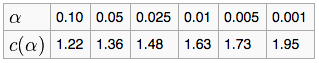

In [37]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ks2sample_table.png")

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [39]:
day.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,night
599,2991,1/1/2015 7:02,1/1/2015 7:52,499,Broadway & W 60 St,40.769155,-73.981918,499,Broadway & W 60 St,40.769155,-73.981918,17181,Subscriber,1974.0,1,2015-01-01 07:02:00,False
600,284,1/1/2015 7:02,1/1/2015 7:07,300,Shevchenko Pl & E 7 St,40.728145,-73.990214,503,E 20 St & Park Ave,40.738274,-73.987520,15694,Subscriber,1957.0,1,2015-01-01 07:02:00,False
601,587,1/1/2015 7:03,1/1/2015 7:13,318,E 43 St & Vanderbilt Ave,40.753202,-73.977987,449,W 52 St & 9 Ave,40.764618,-73.987895,17582,Subscriber,1969.0,1,2015-01-01 07:03:00,False
602,282,1/1/2015 7:04,1/1/2015 7:09,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,243,Fulton St & Rockwell Pl,40.688226,-73.979382,20930,Subscriber,1983.0,2,2015-01-01 07:04:00,False
603,1577,1/1/2015 7:05,1/1/2015 7:32,478,11 Ave & W 41 St,40.760301,-73.998842,147,Greenwich St & Warren St,40.715422,-74.011220,17878,Subscriber,1983.0,1,2015-01-01 07:05:00,False


In [40]:
nightar=np.array(night['tripduration'].sort_values())

In [41]:
dayar=np.array(day['tripduration'].sort_values())

In [42]:
len(nightar)

89430

In [43]:
len(dayar)

196122

In [44]:
daysample=day.sample(89430)

In [45]:
lendayar=np.array(daysample['tripduration'].sort_values())

In [46]:
len(lendayar)

89430

In [47]:
# and tell me what you find in terms of NULL hypothesis
Pt = scipy.stats.pearsonr(lendayar,nightar)
print(Pt)


# The Pearson correlation coefficient measures the linear relationship between two datasets. 
# Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed, and not necessarily zero-mean.
# Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 
# Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. 
# Negative correlations imply that as x increases, y decreases.

# The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
# The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so

(0.96417444362228277, 0.0)


In [49]:
# manhattan and BK riders by age
manhattanar=np.array(manhattan['age'].sort_values())
BKar=np.array(Brooklyn['age'].sort_values())

In [ ]:
len(manhattan)

In [51]:
len(BKar)

94350

In [54]:
manhattansample=manhattan.sample(94350)

In [55]:
manhattanar=np.array(manhattansample['age'].sort_values())

In [56]:
Pt = scipy.stats.pearsonr(manhattanar,BKar)
print(Pt)

(0.99857202516029198, 0.0)


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [57]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis



** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [58]:
dayar

array([   60,    60,    60, ..., 41961, 42798, 43023])

In [59]:
nightar

array([   60,    60,    60, ..., 42101, 42878, 42896])

In [60]:
sp=scipy.stats.spearmanr(lendayar,nightar)
print(sp)

SpearmanrResult(correlation=0.99999869908738581, pvalue=0.0)


In [61]:
# for age citibiker rider between Manhattan and BK
sp=scipy.stats.spearmanr(manhattanar,BKar)
print(sp)


SpearmanrResult(correlation=0.99918918606867813, pvalue=0.0)
